Use autoML Library Pycaret

In [ ]:
!pip install -q pycaret

In [1]:
import os 
import pandas as pd
#print(os.getcwd())

In [2]:
dataset = pd.read_csv('Data/indian_liver_patient.csv')

In [3]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
#Small dataset
dataset.shape

(583, 11)

In [5]:
#0 : No disease
#1 : Liver disease
dataset['Dataset'] = dataset['Dataset']-1

It's an unbalanced dataset. Just than 28% has a liver disease in this dataset 

In [6]:
(dataset.Dataset.value_counts())/dataset.shape[0]

0    0.713551
1    0.286449
Name: Dataset, dtype: float64

In [7]:
from pycaret.classification import *

Initialize the setup with some preprocessing and transformation stuff to do on the data </br>
For this first experiment we choose to do nothing just remplace missing values by mean values (default imputation)

In [8]:
exp_01 = setup(data = dataset, target = 'Dataset', session_id=123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(583, 11)"
4,Missing Values,True
5,Numeric Features,9
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


This function allow us to compare some ML models </br>
The class data is unbalanced so take the accuracy for principal metric can mislead us.</br>
So we choose the F1-score </br>
The best one based on F1 is Naives Bayes Classifier and Adaboost(best balance between accuracy and F1).</br>
Our model can predict than a patient has a liver disease with an F1 score of 53% </br>
It's a very low score, our model has a low predictive power </br>

In [9]:
compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Naive Bayes,0.527100,0.726900,0.940200,0.374100,0.534100,0.209600
1,Quadratic Discriminant Analysis,0.534400,0.710400,0.897700,0.374300,0.526500,0.204400
2,Ada Boost Classifier,0.713200,0.725100,0.402300,0.485300,0.431600,0.247800
3,Decision Tree Classifier,0.659200,0.587200,0.418200,0.428100,0.413300,0.175900
4,Light Gradient Boosting Machine,0.688900,0.700500,0.328000,0.456000,0.370000,0.176000
5,Random Forest Classifier,0.710900,0.686700,0.282600,0.496100,0.348800,0.186900
6,CatBoost Classifier,0.698800,0.697100,0.250800,0.464200,0.319600,0.150100
7,K Neighbors Classifier,0.667100,0.636100,0.276500,0.382200,0.313700,0.106900
8,Extra Trees Classifier,0.691300,0.703200,0.247700,0.445100,0.310800,0.134500
9,Gradient Boosting Classifier,0.681300,0.700400,0.250800,0.418100,0.305400,0.118600


In [10]:
#Let's isolate the Top 4 models
NB = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.4146,0.6515,0.9091,0.3030,0.4545,0.0872
1,0.6585,0.7299,1.0000,0.4615,0.6316,0.3854
2,0.5122,0.7414,0.9167,0.3667,0.5238,0.1816
3,0.4634,0.7213,1.0000,0.3529,0.5217,0.1570
4,0.5122,0.6782,1.0000,0.3750,0.5455,0.2085
5,0.5610,0.6724,0.8333,0.3846,0.5263,0.2099
6,0.4878,0.6552,0.9167,0.3548,0.5116,0.1551
7,0.5610,0.8017,0.9167,0.3929,0.5500,0.2376
8,0.5500,0.8088,0.9091,0.3704,0.5263,0.2225
9,0.5500,0.8088,1.0000,0.3793,0.5500,0.2516


In [11]:
ADA = create_model('ada',verbose=False)
QDA = create_model('qda',verbose=False)
DT = create_model('dt',verbose=False)

In [12]:
#Let's tune our models
#F1 and Accuracy increase
tuned_nb = tune_model('nb',optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.4390,0.6758,1.0000,0.3235,0.4889,0.1404
1,0.6341,0.7126,1.0000,0.4444,0.6154,0.3533
2,0.5122,0.7443,0.9167,0.3667,0.5238,0.1816
3,0.4634,0.7098,1.0000,0.3529,0.5217,0.1570
4,0.5122,0.6609,1.0000,0.3750,0.5455,0.2085
5,0.6098,0.6868,0.9167,0.4231,0.5789,0.2976
6,0.5122,0.6092,0.9167,0.3667,0.5238,0.1816
7,0.5610,0.8132,0.9167,0.3929,0.5500,0.2376
8,0.5000,0.8056,0.9091,0.3448,0.5000,0.1684
9,0.5000,0.7962,1.0000,0.3548,0.5238,0.1984


In [13]:
#F1 score decrease
#Accuracy increase, it possible that our model has improve in the classification of the patient whith no diseas
tuned_ada = tune_model('ada',optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6829,0.6045,0.5455,0.4286,0.4800,0.2566
1,0.6829,0.7241,0.3333,0.4444,0.3810,0.1736
2,0.6585,0.6925,0.1667,0.3333,0.2222,0.0337
3,0.8293,0.7974,0.5833,0.7778,0.6667,0.5550
4,0.8049,0.7701,0.5000,0.7500,0.6000,0.4777
5,0.7561,0.6782,0.4167,0.6250,0.5000,0.3471
6,0.6341,0.7241,0.4167,0.3846,0.4000,0.1374
7,0.7073,0.6839,0.2500,0.5000,0.3333,0.1717
8,0.7000,0.7367,0.2727,0.4286,0.3333,0.1519
9,0.7250,0.7774,0.2727,0.5000,0.3529,0.1971


In [14]:
#Improvement
tuned_qda = tune_model('qda',optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.4390,0.7091,0.8182,0.3000,0.4390,0.0764
1,0.6341,0.7213,0.9167,0.4400,0.5946,0.3293
2,0.5366,0.7672,0.9167,0.3793,0.5366,0.2091
3,0.4634,0.7184,1.0000,0.3529,0.5217,0.1570
4,0.5610,0.6322,0.9167,0.3929,0.5500,0.2376
5,0.6341,0.6897,0.7500,0.4286,0.5455,0.2756
6,0.5366,0.5747,0.8333,0.3704,0.5128,0.1809
7,0.6585,0.8046,0.9167,0.4583,0.6111,0.3622
8,0.5750,0.8276,0.8182,0.3750,0.5143,0.2202
9,0.6000,0.8339,1.0000,0.4074,0.5789,0.3089


In [15]:
tuned_dt = tune_model('dt',optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6341,0.5924,0.4545,0.3571,0.4000,0.1423
1,0.7317,0.7931,0.1667,0.6667,0.2667,0.1694
2,0.6098,0.6221,0.1667,0.2500,0.2000,-0.0446
3,0.6829,0.6825,0.0000,0.0000,0.0000,-0.0472
4,0.5854,0.6365,0.5000,0.3529,0.4138,0.1076
5,0.6585,0.6178,0.0833,0.2500,0.1250,-0.0250
6,0.5854,0.4511,0.0833,0.1429,0.1053,-0.1408
7,0.6829,0.7184,0.0000,0.0000,0.0000,-0.0472
8,0.6000,0.6395,0.0909,0.1429,0.1111,-0.1307
9,0.7250,0.7508,0.1818,0.5000,0.2667,0.1406


ADA model is overfit. Gave more training data could be a solution or regularize more our model. </br>

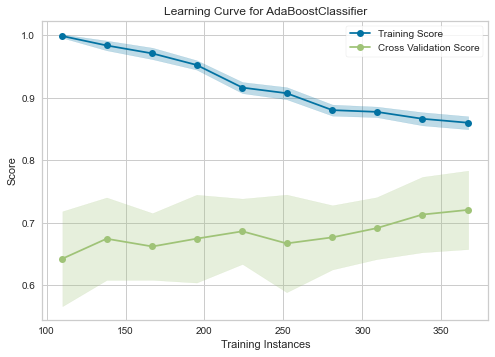

In [16]:
plot_model(tuned_ada,'learning')

QDA model is underfit so badly. We can see it by the two curves which converge at low score </br>
Choice a more complexe model could be a solution

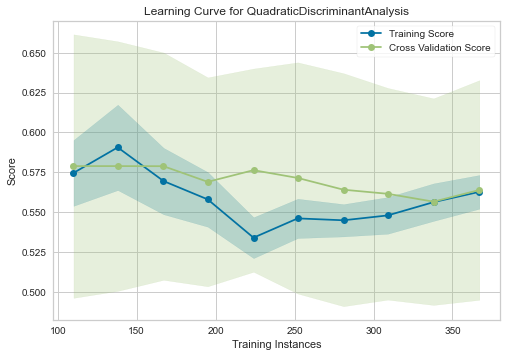

In [17]:
plot_model(tuned_qda,'learning')

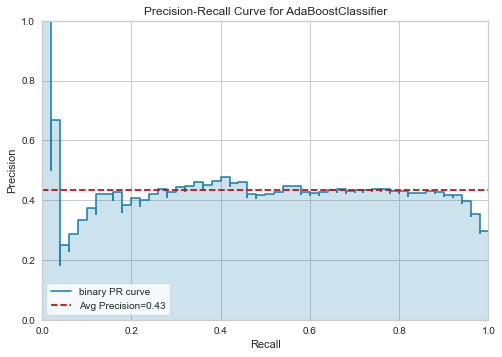

In [18]:
#High recall is very important in this kind of medical problems
plot_model(tuned_ada,'pr')

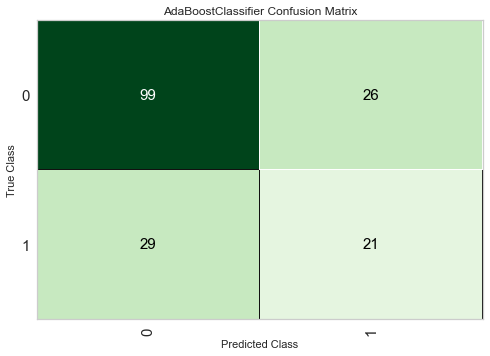

In [19]:
plot_model(tuned_ada,'confusion_matrix')

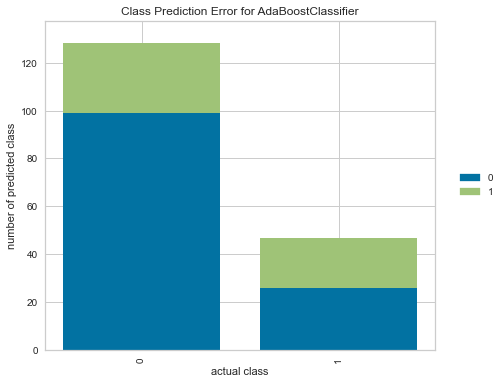

In [20]:
plot_model(tuned_ada,'error')

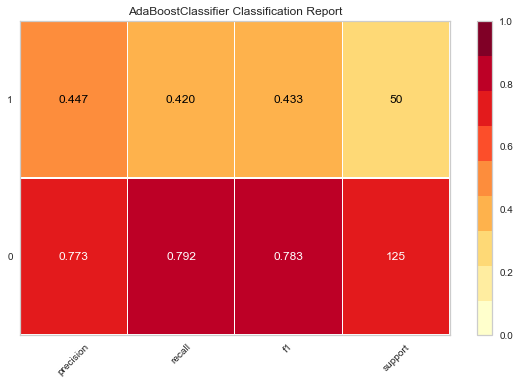

In [21]:
#We have poor result for the patient with a liver disease
plot_model(tuned_ada,'class_report')

Age, Alamine_Aminotransferase and Total_Biliburbin are the top 3 features which leads our model to separate the class

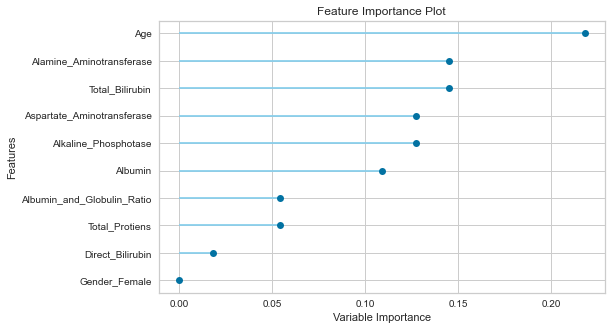

In [22]:
plot_model(tuned_ada,'feature')

In [23]:
import numpy as np
dataset['log_Alamine_Aminotransferase'] = np.log(dataset['Alamine_Aminotransferase'])
dataset['log_Total_Bilirubin'] = np.log(dataset['Total_Bilirubin'])

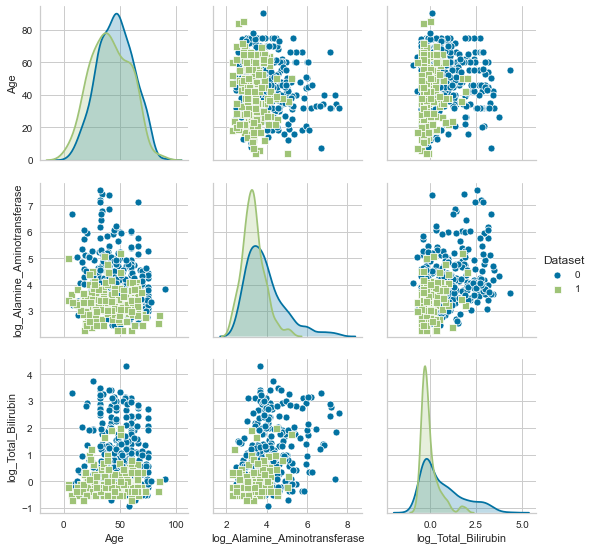

In [26]:
#None of this features separate exactly the two classes, but we can see some trends
import seaborn as sns
sns.pairplot(dataset, hue="Dataset",
             vars=["Age", "log_Alamine_Aminotransferase","log_Total_Bilirubin"],
             markers=["o", "s"])

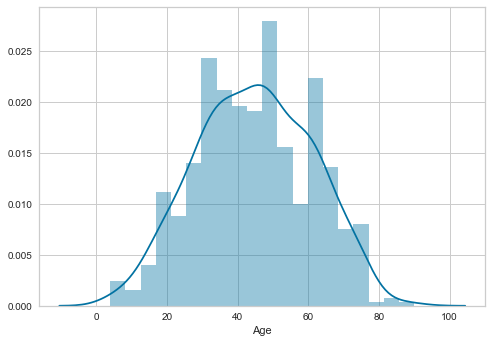

In [27]:
sns.distplot(dataset['Age'],bins=20)

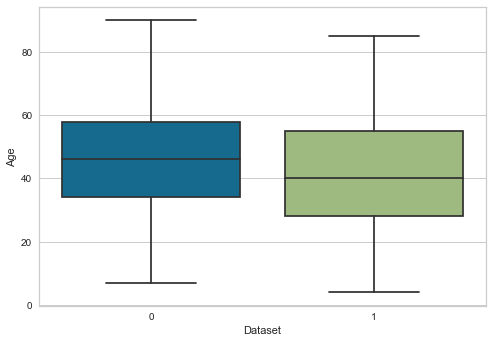

In [28]:
sns.boxplot(dataset.Dataset,dataset.Age)

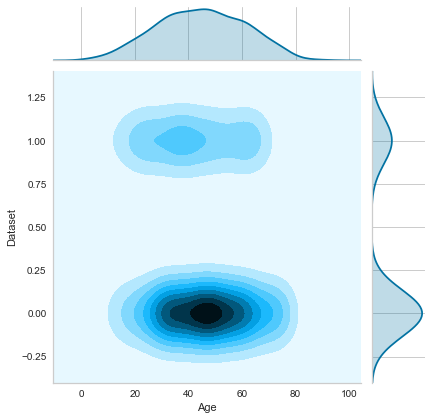

In [30]:
sns.jointplot(dataset['Age'],dataset['Dataset'],kind='kde')

Log transformation needeed --> Right skewed distributions

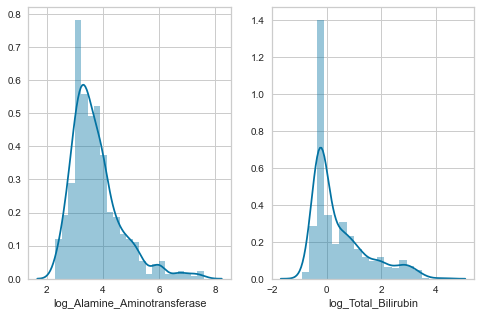

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.distplot(dataset['log_Alamine_Aminotransferase'])
plt.subplot(1,2,2)
sns.distplot(dataset['log_Total_Bilirubin'])

Anomalies data point (delete it ? not good solution --> small dataset but transform it) </br>

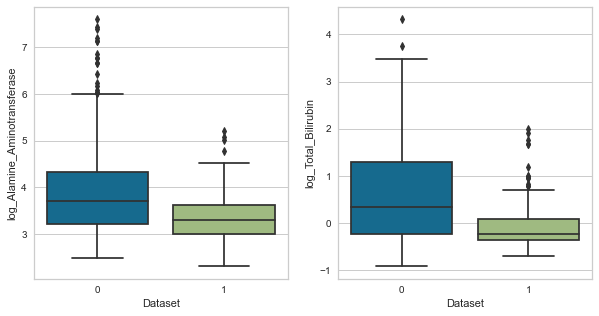

In [32]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(dataset.Dataset,dataset.log_Alamine_Aminotransferase)
plt.subplot(1,2,2)
sns.boxplot(dataset.Dataset,dataset.log_Total_Bilirubin)

Low the Alamine_Aminotransferase is more the a patient could have a liver disease </br>
The same for the log_Total_Bilirubin.

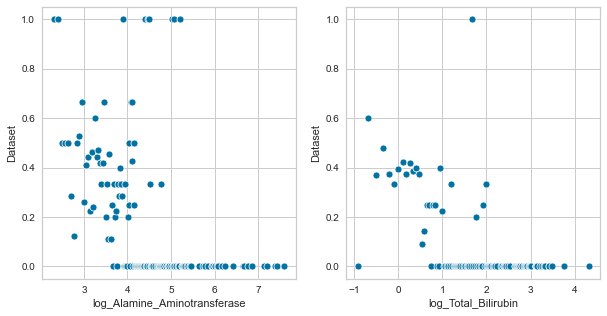

In [33]:
fig = plt.figure(figsize=(10,5))
df_alamine = dataset.groupby('log_Alamine_Aminotransferase')['Dataset'].mean().reset_index()
plt.subplot(1,2,1)
sns.scatterplot(x=df_alamine['log_Alamine_Aminotransferase'],y=df_alamine['Dataset'])
df_total = dataset.groupby('log_Total_Bilirubin')['Dataset'].mean().reset_index()
plt.subplot(1,2,2)
sns.scatterplot(x=df_total['log_Total_Bilirubin'],y=df_total['Dataset'])

###### ALERT This Qcut is just to have an idea
Low the Alamine_Aminotransferase is more the a patient could have a liver disease </br>
The same for the log_Total_Bilirubin.

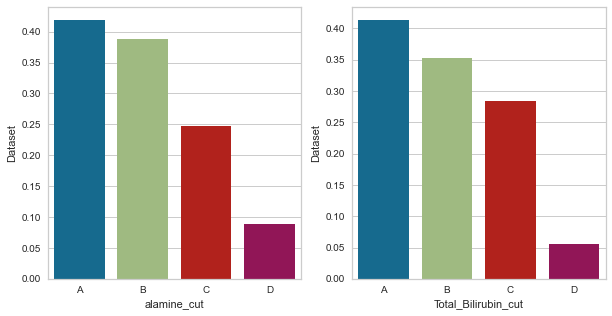

In [34]:
fig = plt.figure(figsize=(10,5))
dataset['alamine_cut'] = pd.qcut(dataset['log_Alamine_Aminotransferase'],q=4,labels=["A","B","C","D"])
df_alamine = dataset.groupby('alamine_cut')['Dataset'].mean().reset_index()
plt.subplot(1,2,1)
sns.barplot(x=df_alamine['alamine_cut'],y=df_alamine['Dataset'])
dataset['Total_Bilirubin_cut'] = pd.qcut(dataset['log_Total_Bilirubin'],q=4,labels=["A","B","C","D"])
df_total = dataset.groupby('Total_Bilirubin_cut')['Dataset'].mean().reset_index()
plt.subplot(1,2,2)
sns.barplot(x=df_total['Total_Bilirubin_cut'],y=df_total['Dataset'])

In [35]:
#interpret_model()
#(Type Error): This function only supports tree based models for binary classification.

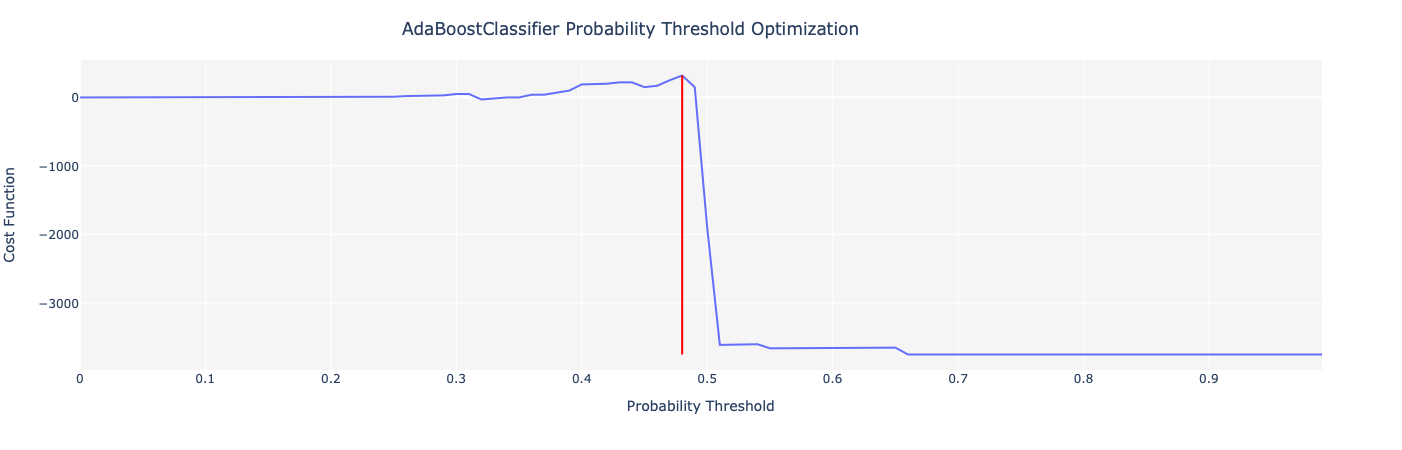

Optimized Probability Threshold: 0.48 | Optimized Cost Function: 320


In [36]:
optimize_threshold(tuned_ada, true_negative = 10, false_negative = -100)

Classification report and dataset with the label and proba

In [37]:
predict_model(tuned_ada)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ada Boost Classifier,0.6857,0.7152,0.42,0.4468,0.433,0.2159


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Dataset,Label,Score
0,62.0,0.7,0.2,162.0,12.0,17.0,8.2,3.2,0.60,0.0,1,1,0.5011
1,45.0,0.7,0.2,180.0,18.0,58.0,6.7,3.7,1.20,0.0,1,1,0.5013
2,37.0,1.8,0.8,145.0,62.0,58.0,5.7,2.9,1.00,0.0,0,1,0.5063
3,32.0,3.7,1.6,612.0,50.0,88.0,6.2,1.9,0.40,0.0,0,0,0.3235
4,40.0,1.2,0.6,204.0,23.0,27.0,7.6,4.0,1.10,0.0,0,1,0.5023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,62.0,5.0,2.1,103.0,18.0,40.0,5.0,2.1,1.72,0.0,0,1,0.5403
171,32.0,0.7,0.1,240.0,12.0,15.0,7.0,3.0,0.70,1.0,0,0,0.4902
172,57.0,4.5,2.3,315.0,120.0,105.0,7.0,4.0,1.30,0.0,0,0,0.4769
173,60.0,5.7,2.8,214.0,412.0,850.0,7.3,3.2,0.78,0.0,0,0,0.3918


Adaboost with the final parameters

In [38]:
finalize_model(tuned_ada)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.98,
                   n_estimators=55, random_state=123)

In [39]:
save_model(tuned_ada,'Model_output/ada_clf')

Transformation Pipeline and Model Succesfully Saved


In [40]:
dataset = pd.read_csv('Data/indian_liver_patient.csv')
dataset.Dataset = dataset.Dataset - 1
exp_02 = setup(data = dataset, target = 'Dataset', session_id=1234,
              transformation=True,polynomial_features=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1234
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(583, 11)"
4,Missing Values,True
5,Numeric Features,9
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [41]:
prepro_data = exp_02[0]
pipeline = exp_02[7]

In [42]:
pipeline

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Dataset',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Le...
                 Scaling_and_Power_transformation(function_to_apply='yj',
                                                  random_state_quantile=1234,
                                                  target='Dataset')),
                ('pt_target', Empty()), ('binn', Empty()),
                ('rem_outliers', Empty()), 

All the data except the label has been transformed (standardization zscore)

In [43]:
prepro_data.head()

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Direct_Bilirubin_Power2,Age_Power2,Alamine_Aminotransferase_Power2,Gender_Female
0,-0.967323,-1.189815,-0.427829,-1.324274,0.255159,0.196188,-0.043200,-0.859316,1.243444,-1.411338,1.0
1,1.721756,1.716247,1.771466,0.863923,0.943655,0.070197,-0.613072,1.842151,1.062639,0.704373,0.0
2,1.589707,1.625382,1.367757,0.504056,0.448229,0.196188,-0.076827,1.775797,1.062639,0.635662,0.0
3,-0.397769,-0.224252,-0.498616,-1.139496,0.255159,0.322270,0.280021,-0.494923,0.820741,-1.705458,0.0
4,1.235002,1.256312,-0.321095,0.355056,0.743317,-0.934200,-2.109832,1.375847,1.663412,-0.433023,0.0


With preprocessing and transformed step we find betters results but some models </br>
like ada decrease considerably

In [44]:
compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Naive Bayes,0.634800,0.731300,0.787100,0.430600,0.555100,0.290600
1,Quadratic Discriminant Analysis,0.617800,0.706700,0.737900,0.410900,0.524100,0.248100
2,Light Gradient Boosting Machine,0.691000,0.695500,0.368900,0.469400,0.402700,0.202900
3,Extra Trees Classifier,0.732800,0.746200,0.325800,0.580700,0.397700,0.249500
4,Gradient Boosting Classifier,0.691100,0.706800,0.351500,0.486500,0.393000,0.195700
5,Decision Tree Classifier,0.619900,0.553900,0.400000,0.362600,0.376800,0.106500
6,SVM - Linear Kernel,0.664000,0.000000,0.417400,0.360300,0.371800,0.166800
7,Ada Boost Classifier,0.681500,0.708900,0.337100,0.451900,0.369200,0.169400
8,CatBoost Classifier,0.701000,0.730500,0.301500,0.487500,0.358500,0.182700
9,Random Forest Classifier,0.703400,0.717800,0.283300,0.468300,0.342000,0.173100


In [45]:
nb = create_model('nb',verbose=False)
qda = create_model('qda',verbose=False)
lgbm = create_model('lightgbm',verbose=False)

In [46]:
#Better F1 than our first ADA model but lower accuracy.
tuned_nb = tune_model('nb',optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6829,0.7931,0.8333,0.4762,0.6061,0.3722
1,0.5122,0.6149,0.7500,0.3462,0.4737,0.1221
2,0.5610,0.6925,0.7500,0.3750,0.5000,0.1800
3,0.6585,0.7069,0.7500,0.4500,0.5625,0.3101
4,0.6341,0.7299,0.8333,0.4348,0.5714,0.3035
5,0.5366,0.6207,0.5833,0.3333,0.4242,0.0824
6,0.8049,0.8707,0.9167,0.6111,0.7333,0.5890
7,0.7073,0.7485,0.9091,0.4762,0.6250,0.4212
8,0.6500,0.8025,0.9091,0.4348,0.5882,0.3443
9,0.6000,0.7335,0.6364,0.3684,0.4667,0.1816


In [47]:
#Improve
tuned_qda = tune_model('qda',optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7073,0.7989,0.6667,0.5000,0.5714,0.3560
1,0.5366,0.6207,0.6667,0.3478,0.4571,0.1178
2,0.6098,0.6782,0.6667,0.4000,0.5000,0.2115
3,0.7073,0.7960,0.6667,0.5000,0.5714,0.3560
4,0.5854,0.7414,0.5833,0.3684,0.4516,0.1448
5,0.5854,0.6236,0.5833,0.3684,0.4516,0.1448
6,0.8049,0.8621,0.7500,0.6429,0.6923,0.5507
7,0.7073,0.7606,0.8182,0.4737,0.6000,0.3941
8,0.6000,0.7492,0.8182,0.3913,0.5294,0.2506
9,0.6750,0.7398,0.5455,0.4286,0.4800,0.2486


In [48]:
tuned_lgbm = tune_model('lightgbm',optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7073,0.7428,0.1667,0.5000,0.2500,0.1214
1,0.6098,0.5402,0.4167,0.3571,0.3846,0.1014
2,0.6098,0.7083,0.2500,0.3000,0.2727,0.0091
3,0.6341,0.6063,0.1667,0.2857,0.2105,-0.0065
4,0.7317,0.7730,0.5000,0.5455,0.5217,0.3358
5,0.6829,0.7356,0.3333,0.4444,0.3810,0.1736
6,0.7561,0.8420,0.4167,0.6250,0.5000,0.3471
7,0.7073,0.7697,0.1818,0.4000,0.2500,0.0989
8,0.6750,0.7241,0.6364,0.4375,0.5185,0.2857
9,0.7500,0.7273,0.2727,0.6000,0.3750,0.2453


This function allow to display somes results </br>
- Learning curve : Underfit </br>
- Decision boundary, confusion matrix: we have a lot of false positive that hints the precision of the liver disease patient is not high </br>
- class report :Low Recall  and low precision for the liver disease class </br>
- ...

In [49]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…